In [ ]:
'''In this method, subarrays frequencies have been used instead of uniform length extraction.'''

'In this method, subarrays frequencies have been used instead of uniform length extraction.'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
import pandas as pd
import numpy as np 
import random
import math
import matplotlib.pyplot as plt

In [85]:
x=pd.read_csv('/content/drive/MyDrive/Project/brown.csv')
text3=''
for i in x.tokenized_text[:10000]:
    text3+=i

In [86]:
from string import ascii_letters

allowed = set(ascii_letters + ' ')

answer = ''.join(l for l in text3 if l in allowed)
answer=answer.replace('  ',' ')
text3=answer
text=text3
string=text.lower()

In [87]:
primi=string.split()

In [88]:
string=''
c=0
l=[]
primi_fre={}
for i in range(len(primi)):
  if len(string)>15000:
    break
  string+=primi[i]
  c+=len(primi[i])
  l.append(primi[i])
  try:
    primi_fre[primi[i]]+=1
  except:
    primi_fre[primi[i]]=1



primi=list(set(l))

In [89]:
len(string)

15007

In [90]:
c=0
for i in primi_fre.keys():
  if primi_fre[i]>1:
    c+=1
print(c/len(primi_fre))

0.26561125769569044


In [91]:
def entropy(arr):
    s=0
    for i in arr:
      if i!=0:
        s+=-i/sum(arr)*math.log2(i/sum(arr))
    return s

In [92]:
def subarray(string):
  f = open("/content/drive/MyDrive/Project/vp_subwei10.txt","w+")
  c=0
  string=string.lower()
  l=[]
  for i in range(len(string)):
    for j in range(2,min(15,len(string)-i+1)):                #Length 50 has been taken
      try:
        f.writelines(str(string[i:i+j]).replace('0','*')+'\n')
        c+=1
      except:
        pass
  f.close()
subarray(string)                         #Substrings generated and stored in a file

In [93]:
df = pd.read_csv("/content/drive/MyDrive/Project/vp_subwei10.txt",names=['a'])
df.to_csv('/content/drive/MyDrive/Project/vp_subwei10.csv')

In [ ]:
del df

In [ ]:
x=pd.read_csv('/content/drive/MyDrive/Project/vp_subwei10.csv',names=['a']) 
x['new'] = x.a.str[1:-1]
x['front'] = x.a.str[0]
x['back'] = x.a.str[-1]

counter={}
le=len(x['new'].unique())
c=1
f=open('/content/drive/MyDrive/Project/vp_wei10.txt','w+')
for i in set(x['new']):
    print(c,'/',le)
    c+=1
    d=x[x['new']==i]
    entf=entropy(d.groupby('front').count()['a'])
    entb=entropy(d.groupby('back').count()['a'])
    y=((min(len(d['front'].unique()),len(d['back'].unique()))))   #The count of different types of characters are noted
    y=min(entf,entb)
    f.writelines(str(i)+' '+str(y)+'_'+str(len(d))+'\n')
f.close()

del x

Streaming output truncated to the last 5000 lines.
111862 / 116861
111863 / 116861
111864 / 116861
111865 / 116861
111866 / 116861
111867 / 116861
111868 / 116861
111869 / 116861
111870 / 116861
111871 / 116861
111872 / 116861
111873 / 116861
111874 / 116861
111875 / 116861
111876 / 116861
111877 / 116861
111878 / 116861
111879 / 116861
111880 / 116861
111881 / 116861
111882 / 116861
111883 / 116861
111884 / 116861
111885 / 116861
111886 / 116861
111887 / 116861
111888 / 116861
111889 / 116861
111890 / 116861
111891 / 116861
111892 / 116861
111893 / 116861
111894 / 116861
111895 / 116861
111896 / 116861
111897 / 116861
111898 / 116861
111899 / 116861
111900 / 116861
111901 / 116861
111902 / 116861
111903 / 116861
111904 / 116861
111905 / 116861
111906 / 116861
111907 / 116861
111908 / 116861
111909 / 116861
111910 / 116861
111911 / 116861
111912 / 116861
111913 / 116861
111914 / 116861
111915 / 116861
111916 / 116861
111917 / 116861
111918 / 116861
111919 / 116861
111920 / 116861
11192

In [94]:
c=pd.read_csv('/content/drive/MyDrive/Project/vp_wei10.txt') #TXT to CSV converter
c.to_csv('/content/drive/MyDrive/Project/vp_wei10.csv')
c=pd.read_csv('/content/drive/MyDrive/Project/vp_wei10.csv',names=['a'])

In [95]:
c

,a
NaN,4.143418479729209_15007
0.0,nan 0_0
1.0,ealizetha 0.0_1
2.0,lowto 0.0_1
3.0,acentse 0.0_1
...,...
116855.0,hatwou 0.0_1
116856.0,hohave 0.0_1
116857.0,egitimately 0.0_1
116858.0,onbysa 0.0_1


In [96]:
d={}
yt=''
yt1='-1_-1'
for i in c['a']:
  i=str(i)
  for j in range(len(i)-1,0,-1):
    if i[j]==' ':
      yt=i[:j]
      yt1=i[-len(i)+j+1:]
      break
  try:
    d[yt]=[float(i) for i in yt1.split('_')]
  except:
    pass

import collections 
d = collections.OrderedDict(sorted(d.items()))

For each Subarray the corresponding Variety of Preceding or Succeding characters is noted

---



In [97]:
#Print sample Dictionary with elements as entropy and frequency

for i in range(10):
  print(list(d.items())[i])

('', [-1.0, -1.0])
('a', [3.5313883278244855, 1132.0])
('aa', [0.0, 1.0])
('aan', [0.0, 1.0])
('aand', [0.0, 1.0])
('aanda', [0.0, 1.0])
('aandar', [0.0, 1.0])
('aandare', [0.0, 1.0])
('aandarew', [0.0, 1.0])
('aandarewo', [0.0, 1.0])


### Building the Tree

In [98]:
fre={}
for i in d.keys():
  fre[i]=d[i][1]

In [99]:
ent={}
for i in d.keys():
  ent[i]=d[i][0]

In [100]:
relative_ent={}
relative_fre={}
for i in ent.keys():
  if ent[i]!=0 and len(i)!=0:
    try:
      relative_ent[len(i)].append(ent[i]*fre[i])
      relative_fre[len(i)]+=fre[i]
    except:
      relative_ent[len(i)]=[ent[i]*fre[i]]
      relative_fre[len(i)]=fre[i]

relative={}
for i in relative_ent.keys():
  relative[i]=sum(relative_ent[i])/relative_fre[i]

new_ent={}
for i in ent.keys():
  if len(i)!=0:
    new_ent[i]=ent[i]/relative[len(i)]

In [101]:
class tree(object):
    def __init__(self, char: str):
        self.char = char
        self.children = []
        self.entropy = 1
        self.freq=0

In [102]:
def add(root, word,variation,frequency):
    node = root
    for char in word:
        found_in_child = False
        # Search for the character in the children of the present `node`
        for child in node.children:
            if child.char == char:
              node = child
              found_in_child = True
              break
        # We did not find it so add a new chlid
        if not found_in_child:
          new_node = tree(char)
          node.children.append(new_node)
          # And then point node to the new child
          node = new_node
    node.entropy=variation
    node.freq=frequency

In [103]:
def primitives(d):
  root = tree('*')
  for i in d.keys():
    try:
      add(root,i,ent[i],fre[i])
    except:
      pass
  return root

root=primitives(d)
root.counter=-1  

In [104]:
root

In [105]:
def print_tree(root,s,final,prev_c,length):
  s+=root.char
  if root.entropy>prev_c and len(root.children)>1:
    final.append(s[1:])

  if root.children==[]:
    s=''
    length=0
    return 0 
  for child in root.children:
    print_tree(child,s,final,root.entropy,length+1)

m=[]
n=[]
print_tree(root,'',m,100,0)
m=list(set(m))

In [106]:
len(m)

1663

In [107]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in m:
  if i in mores:
    c+=1
print(c/len(mores))

0.5894039735099338


In [108]:
def ent_string(word,string):
  f={}
  b={}
  for i in range(len(string)):
    if string[i:i+len(word)]==word:
      if i>0:
        try:
          f[string[i-1]]+=1
        except:
          f[string[i-1]]=1
      if i+len(word)<len(string):
        try:
          b[string[i+len(word)]]+=1
        except:
          b[string[i+len(word)]]=1
  return min(entropy(list(f.values())),entropy(list(b.values())))

In [109]:
def guide(k,string):
    x=0
    d={}
    e={}
    k=sorted(k,key=len,reverse=True)
    i=0
    c=0
    while i<len(string):
        t=0
        for j in k:
            if string[i:len(j)+i]==j:
                t=1
                try:
                    d[len(j)]+=1
                except:
                    d[len(j)]=1
                try:
                    e[j]+=1
                except:
                    e[j]=1
                i=i+len(j)
                break
        if t==0:
            i=i+1
            c=c+1
    
    
    for i in d.keys():
        x+=d[i]*i
    
    try:
        return [c/len(string),sum(d.values())/x+2*math.ceil(math.log2(len(k)))*sum(e.values())/len(string)]
    except:
        return [c/len(string),-1]

In [110]:
print(guide(m,string))

[0.0, 7.804091424002133]


In [111]:
#Remove all zero entropy elements

def zero_ent(m,ent):
  g=[]
  c=0
  for i in m:
    c+=1
    if ent[i]==0 and fre[i]>1:
      for j in m:
        if j+i in ent.keys() and i+j in ent.keys() and ent[i+j]>ent[j+i] and ent[j+i]>0:
          g.append(i+j)
        elif j+i in ent.keys() and i+j in ent.keys() and ent[j+i]>ent[i+j] and ent[i+j]>0:
          g.append(j+i)
        elif j+i in fre.keys() and ent[j+i]==0 and fre[j+i]>1:
          g.append(j+i)
        elif i+j in fre.keys() and ent[i+j]==0 and fre[i+j]>1:
          g.append(i+j)
    else:
      g.append(i)
  return list(set(g))


g_prev=m
g=zero_ent(g_prev,ent)
while set(g_prev)-set(g).intersection(set(g_prev))!=set():
  g_prev=g
  g=zero_ent(g_prev,ent)

In [112]:
#Check for different values of alpha and beta and it's effect on convergence and accuracy

In [113]:
print(guide(g,string))

[0.0, 7.804091424002133]


In [114]:
#Check if there is any left for handling 0 entropy combination

for i in g:
  if i in ent.keys() and ent[i]==0 and fre[i]>1:
    print('*')

###Split Function

In [115]:
#Split the existing elements based on 3 conditions:
#Entropy of either child is greater than its parents
#Frequency of both children is greater than the parent
#Difference in entropy of 2 children should be maximum

def split_primitives(word,fre,ent,string):

  if ent[word]==0 and fre[word]>1:
    return -1,-1

  diff=0
  
  diff_max=0
  index=-1
  for i in range(1,len(word)-1):
    if ent[word[:i]]>ent[word] or ent[word[i:]]>ent[word] and min(ent[word[:i]],ent[word[i:]])!=0:
      if fre[word[:i]]>=fre[word] and fre[word[i:]]>=fre[word]:
        diff=abs(ent[word[:i]]+ent[word[i:]]-ent[word])
        if diff>diff_max:
          index=i
          diff_max=diff
  if index!=-1:
    i=index
    return word[:i],word[i:]
  else:
    return -1,-1

In [116]:
#Implementing the split function

m=[]
for i in g:
  e,f=split_primitives(i,fre,new_ent,string)
  if e==-1:
    m.append(i)
    pass
  else:
    m.append(e)
    m.append(f)

In [117]:
print(guide(m,string))

[0.0, 6.932364896381689]


In [34]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(m):
  if i in mores:
    c+=1
print(c/len(mores))

0.5264900662251656


In [38]:
f=open('/content/drive/MyDrive/Project/vp_words.txt','w+')
for i in m:
  f.writelines(i+'\n')
f.close()

c=pd.read_csv('/content/drive/MyDrive/Project/vp_words.txt',names=['List']) 
m=list(c['List'])

In [39]:
c=pd.read_csv('/content/drive/MyDrive/Project/vp_words.txt',names=['List']) 
m=list(c['List'])

###Building Tree for extracting maximum length suffix and prefix

In [75]:
class st(object):
    def __init__(self, char: str):
        self.char = char
        self.children = []
        self.end=0
        self.freq=0

In [76]:
def st_add(root, word):
    node = root
    for char in word:
        found_in_child = False
        # Search for the character in the children of the present `node`
        for child in node.children:
            if child.char == char:
              #child.counter += 1
              node = child
              found_in_child = True
              break
        # We did not find it so add a new chlid
        if not found_in_child:
          new_node = st(char)
          node.children.append(new_node)
          # And then point node to the new child
          node = new_node
    node.end=1
    node.freq=fre

In [77]:
def st_search(root,word):
  if word=='':
    return 
  node = root
  c=0
  for char in word:
    c+=1
    found_in_child = False
    for child in node.children:
      if child.char == char:
        node = child
        found_in_child = True
        word=word[1:]
        if word=='':
          return node.end
        break
  if found_in_child==False:
    return -1
  if len(word)==0 and node.children==[]:
    return node.end

###Combine Primitives Section

In [78]:
#Finding Suffix of a Primitive for Combination

def suffix_replacement(k,word,fmax,fre,ind,res_m,guide_m,root,string):

  mat1=np.zeros(len(k))

  for t in range(len(string)):
      if string[t:len(word)+t]==word:
        j=fmax
        while t+j+len(word)>t+len(word):
          b=st_search(root,string[t+len(word):t+j+len(word)])
          if b==1:
            mat1[ind[string[t+len(word):t+j+len(word)]]]+=1
            break
          j-=1

  rep=[]
  if sum(mat1)==fre[word]:
    for i in range(len(mat1)):
      if mat1[i]!=0 and word+k[i] in fre.keys() and fre[word+k[i]]>1:
        rep.append(word+k[i])

  tr=k.copy()
  tr.remove(word)
  tr+=rep
  
  res_tr,guide_tr=guide(tr,string)

  if res_m==res_tr and guide_m>guide_tr and rep!=[]:
    return rep,guide_m-guide_tr

  return [],0

In [79]:
#Finding Prefix of a Primitive for Combination

def prefix_replacement(k,word,fmax,fre,ind,res_m,guide_m,root,string):

  mat1=np.zeros(len(k))
  
  for t in range(len(string)):
      if string[t:len(word)+t]==word:
        f=fmax
        while t-f<t:
          b=st_search(root,string[t-f:t])
          if b==1:
            mat1[ind[string[t-f:t]]]+=1
            break
          f-=1
  
  rep=[]
  if sum(mat1)==fre[word]:
    for i in range(len(mat1)):
      if mat1[i]!=0 and k[i]+word in fre.keys() and fre[k[i]+word]>1:
        rep.append(k[i]+word)

  tr=k.copy()
  tr.remove(word)
  tr+=rep
  
  res_tr,guide_tr=guide(tr,string)

  if res_m==res_tr and guide_m>guide_tr and rep!=[]:
    return rep,guide_m-guide_tr

  return [],0

###Implementing Max and Min Prefix for Combining Primitives

In [80]:
def combine_primitives(m,ent,fre,string):
  jo=[]
  c=0
  m=list(set(m))
  root=st('*')
  for i in m:
    st_add(root,i)

  res_m,guide_m=guide(m,string)

  ind={}
  for i in range(len(m)):
    ind[m[i]]=i

  fmax=0
  for i in m:
    if len(i)>fmax:
      fmax=len(i)

  import time
  for i in m:
    tr=m.copy()
    c+=1
    start=time.time()
    t1,res1=suffix_replacement(m,i,fmax,fre,ind,res_m,guide_m,root,string)
    t2,res2=prefix_replacement(m,i,fmax,fre,ind,res_m,guide_m,root,string)
    end=time.time()
    print(c,'/',len(m),end-start)
    if t1==[] and t2==[]:
      e,f=split_primitives(i,fre,ent,string)
      if e!=-1:
        tr.remove(i) 
        tr+=[e,f]
        res_tr,guide_tr=guide(tr,string)
        if guide_tr<guide_m:
          jo+=[e,f]
        else:
          jo+=[i]
      else:
        jo+=[i] 
    elif res1>res2:
      jo+=t1
    elif res2>res1:
      jo+=t2
  return jo

In [177]:
while True:
    try:
      g.remove(np.NaN)
    except:
      break

In [178]:
def iterations(g,new_ent,fre,string):
  prev_guide=100
  g_prev=g.copy()
  c=0
  while guide(g_prev,string)[1]<prev_guide:
    prev_guide=guide(g_prev,string)[1]
    c+=1
    g=combine_primitives(g_prev,new_ent,fre,string)
    while True:
      try:
        g.remove(np.NaN)
      except:
        break
    f=open('/content/drive/MyDrive/Project/iter '+str(c)+'.txt','w+')
    for i in g:
      f.writelines(i+'\n')
    f.close()
    g_prev=g
  return g

In [ ]:
iterations(g,new_ent,fre,string)        #Automatic Operations

In [ ]:
#Manual Operations

In [43]:
jo=combine_primitives(g,new_ent,fre,string)

1 / 1682 2.660646915435791
2 / 1682 2.643092632293701
3 / 1682 2.6558778285980225
4 / 1682 2.6465771198272705
5 / 1682 2.632794141769409
6 / 1682 2.654209613800049
7 / 1682 2.6462953090667725
8 / 1682 2.6578309535980225
9 / 1682 2.6760644912719727
10 / 1682 2.7167065143585205
11 / 1682 2.653589963912964
12 / 1682 2.6567158699035645
13 / 1682 2.6423275470733643
14 / 1682 2.6350085735321045
15 / 1682 2.643751859664917
16 / 1682 2.648733139038086
17 / 1682 2.6416473388671875
18 / 1682 2.6934092044830322
19 / 1682 2.687411069869995
20 / 1682 2.7418296337127686
21 / 1682 2.667628049850464
22 / 1682 2.8211171627044678
23 / 1682 2.6832244396209717
24 / 1682 2.671219825744629
25 / 1682 2.664675712585449
26 / 1682 2.6624770164489746
27 / 1682 2.6689391136169434
28 / 1682 3.493155002593994
29 / 1682 2.66281795501709
30 / 1682 2.6519625186920166
31 / 1682 2.7539937496185303
32 / 1682 2.6481106281280518
33 / 1682 2.652019500732422
34 / 1682 2.6536879539489746
35 / 1682 2.648242950439453
36 / 1682 

In [46]:
f=open('/content/drive/MyDrive/Project/jo_en_words_ne.txt','w+')
for i in jo:
  f.writelines(i+'\n')
f.close()

c=pd.read_csv('/content/drive/MyDrive/Project/jo_en_words_ne.txt',names=['List']) 
jo=list(c['List'])

In [45]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(jo):
  if i in mores:
    c+=1
print(c/len(set(mores)))

0.5728476821192053


In [200]:
print(guide(jo,string))

[0.0, 6.440061304724462]


In [136]:
jo1=combine_primitives(jo,new_ent,fre,string)

1 / 1920 2.232790231704712
2 / 1920 2.269273519515991
3 / 1920 2.204617977142334
4 / 1920 2.2212605476379395
5 / 1920 2.2331528663635254
6 / 1920 2.2053418159484863
7 / 1920 2.1998865604400635
8 / 1920 2.208665132522583
9 / 1920 2.2445616722106934
10 / 1920 2.223227024078369
11 / 1920 2.249584674835205
12 / 1920 2.2249908447265625
13 / 1920 2.251537561416626
14 / 1920 2.2524685859680176
15 / 1920 2.202049493789673
16 / 1920 2.243971824645996
17 / 1920 2.2359447479248047
18 / 1920 2.223179817199707
19 / 1920 2.2160067558288574
20 / 1920 3.597418785095215
21 / 1920 2.2038052082061768
22 / 1920 2.208371877670288
23 / 1920 2.202502727508545
24 / 1920 2.2473068237304688
25 / 1920 2.225724220275879
26 / 1920 2.176521062850952
27 / 1920 2.210453748703003
28 / 1920 2.1657321453094482
29 / 1920 2.1979637145996094
30 / 1920 2.2153666019439697
31 / 1920 2.2270541191101074
32 / 1920 2.25067400932312
33 / 1920 2.1878678798675537
34 / 1920 2.19881534576416
35 / 1920 2.1604292392730713
36 / 1920 2.16

In [52]:
jo1=combine_primitives(jo,new_ent,fre,string)

1 / 1920 2.1997036933898926
2 / 1920 2.197234869003296
3 / 1920 2.2028205394744873
4 / 1920 2.1745338439941406
5 / 1920 2.164996862411499
6 / 1920 2.193288564682007
7 / 1920 2.207242727279663
8 / 1920 2.1804535388946533
9 / 1920 2.201045274734497
10 / 1920 2.2042574882507324
11 / 1920 2.1809680461883545
12 / 1920 2.1864712238311768
13 / 1920 2.1718735694885254
14 / 1920 2.168245553970337
15 / 1920 2.1773080825805664
16 / 1920 2.170532703399658
17 / 1920 2.349259376525879
18 / 1920 2.1696786880493164
19 / 1920 2.1882102489471436
20 / 1920 2.205941677093506
21 / 1920 2.193500280380249
22 / 1920 2.1754629611968994
23 / 1920 2.207573890686035
24 / 1920 2.1831750869750977
25 / 1920 2.430476427078247
26 / 1920 2.1775643825531006
27 / 1920 4.436146020889282
28 / 1920 2.1871230602264404
29 / 1920 2.192770481109619
30 / 1920 2.2218291759490967
31 / 1920 2.1738436222076416
32 / 1920 2.2023794651031494
33 / 1920 2.3543941974639893
34 / 1920 2.6291005611419678
35 / 1920 2.6817758083343506
36 / 192

In [139]:
f=open('/content/drive/MyDrive/Project/jo1_en_words_ne.txt','w+')
for i in jo1:
  f.writelines(i+'\n')
f.close()

c=pd.read_csv('/content/drive/MyDrive/Project/jo1_en_words_ne.txt',names=['List']) 
jo1=list(c['List'])

In [181]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(jo1):
  if i in mores:
    c+=1
print(c/len(set(mores)))

0.7417218543046358


In [198]:
while True:
  try:
    jo1.remove(np.NaN)
  except:
    break

In [199]:
print(guide(jo1,string))

[0.0, 5.791763843539682]


In [168]:
jo2=combine_primitives(jo1,new_ent,fre,string)

1 / 3570 3.473949670791626
2 / 3570 3.484287977218628
3 / 3570 3.4644927978515625
4 / 3570 3.458277940750122
5 / 3570 3.452737808227539
6 / 3570 3.437387466430664
7 / 3570 3.4455413818359375
8 / 3570 3.4711551666259766
9 / 3570 3.4512059688568115
10 / 3570 3.4689462184906006
11 / 3570 3.5013835430145264
12 / 3570 3.485887050628662
13 / 3570 3.443734645843506
14 / 3570 3.440272569656372
15 / 3570 4.041421175003052
16 / 3570 3.4734816551208496
17 / 3570 3.47235369682312
18 / 3570 3.471708297729492
19 / 3570 3.4574718475341797
20 / 3570 3.451545476913452
21 / 3570 3.4429194927215576
22 / 3570 3.466635227203369
23 / 3570 3.4340343475341797
24 / 3570 4.972264289855957
25 / 3570 4.2532453536987305
26 / 3570 3.9817421436309814
27 / 3570 3.9362120628356934
28 / 3570 3.501474618911743
29 / 3570 3.4534964561462402
30 / 3570 3.4501795768737793
31 / 3570 3.4696736335754395
32 / 3570 3.467075824737549
33 / 3570 3.478151559829712
34 / 3570 3.4494709968566895
35 / 3570 3.468163013458252
36 / 3570 3.4

In [50]:
f=open('/content/drive/MyDrive/Project/jo2_en_words_ne.txt','w+')
for i in jo2:
  f.writelines(i+'\n')
f.close()

c=pd.read_csv('/content/drive/MyDrive/Project/jo2_en_words_ne.txt',names=['List']) 
jo2=list(c['List'])

In [183]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(jo2):
  if i in mores:
    c+=1
print(c/len(set(mores)))

0.7582781456953642


In [190]:
print(guide(jo2,string))

[0.0, 5.656893449723462]


In [46]:
jo3=combine_primitives(jo2,new_ent,fre,string)

1 / 3391 7.317463636398315
2 / 3391 3.444924831390381
3 / 3391 3.490520715713501
4 / 3391 3.555025100708008
5 / 3391 3.492645025253296
6 / 3391 3.508913040161133
7 / 3391 3.5951058864593506
8 / 3391 3.471677780151367
9 / 3391 3.469992160797119
10 / 3391 3.5128166675567627
11 / 3391 3.508622646331787
12 / 3391 3.4866251945495605
13 / 3391 3.4627034664154053
14 / 3391 3.4874320030212402
15 / 3391 3.5199735164642334
16 / 3391 3.4999492168426514
17 / 3391 3.5822744369506836
18 / 3391 3.514646530151367
19 / 3391 3.7967801094055176
20 / 3391 3.4714794158935547
21 / 3391 3.5003457069396973
22 / 3391 3.4377307891845703
23 / 3391 3.4877943992614746
24 / 3391 3.4926462173461914
25 / 3391 3.4354310035705566
26 / 3391 3.4684581756591797
27 / 3391 3.5266358852386475
28 / 3391 3.5147807598114014
29 / 3391 3.4289350509643555
30 / 3391 3.4670004844665527
31 / 3391 3.4857842922210693
32 / 3391 3.5113306045532227
33 / 3391 3.563248634338379
34 / 3391 3.5167477130889893
35 / 3391 3.5381288528442383
36 / 

In [47]:
f=open('/content/drive/MyDrive/Project/jo3_en_words_ne.txt','w+')
for i in jo3:
  f.writelines(i+'\n')
f.close()

In [185]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(jo3):
  if i in mores:
    c+=1
print(c/len(set(mores)))

0.8278145695364238


In [187]:
jo3.remove(np.NaN)

In [188]:
print(guide(jo3,string))

[0.0, 5.385620043979476]


In [39]:
def resf(k,string,ent,fre):
    while True:
      try:
        k.remove(np.NaN)
      except:
        break
    x=0
    d={}
    e={}
    k=sorted(k,key=len,reverse=True)
    i=0
    c=0

    ent_dict={}
    for i in k:
      ent_dict[i]=len(i)

    ent_dict=dict(sorted(ent_dict.items(), key=lambda item: item[1],reverse=True))

    k=list(ent_dict.keys())

    i=0
    while i<len(string):
        t=0
        for j in k:
            if string[i:len(j)+i]==j:
                t=1
                try:
                    d[len(j)]+=1
                except:
                    d[len(j)]=1
                try:
                    e[j]+=1
                except:
                    e[j]=1
                i=i+len(j)
                break
    
    return e

In [53]:
f=resf(jo3,string,new_ent,fre)  #Brush off extra elements from set

In [160]:
l1=[7.804091424002133,6.440061304724462,5.730459119077763,5.656893449723462,5.385620043979476]
l2=[0.55,0.5728476821192053,0.7549668874172185,0.7582781456953642,0.8278145695364238]

In [163]:
def plot(l1,l2):
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(111)
    ax.plot(np.linspace(1,len(l1),len(l1)),l1, '-', color='blue',label = 'Guide Score',marker='.')
    ax.set_xticks(np.linspace(1,len(l1),len(l1)))
    ax2 = ax.twinx()
    ax2.plot(np.linspace(1,len(l2),len(l2)),l2, '-r', label = 'Proportion of Words')
    ax2.axhline(y=len(string), color='purple', linestyle='-.')
    ax2.set_ylim([0,1.10])
    ax.legend(loc=7)
    ax2.legend(loc=6)
    ax.grid()
    ax.set_xlabel("Number of Iterations")
    ax.set_ylabel('Guide Score')
    ax2.set_ylabel('Proportion of Extracted Words')
    plt.title('Variation of Guide Score with Extracted Proportion of English Words')
    plt.show()

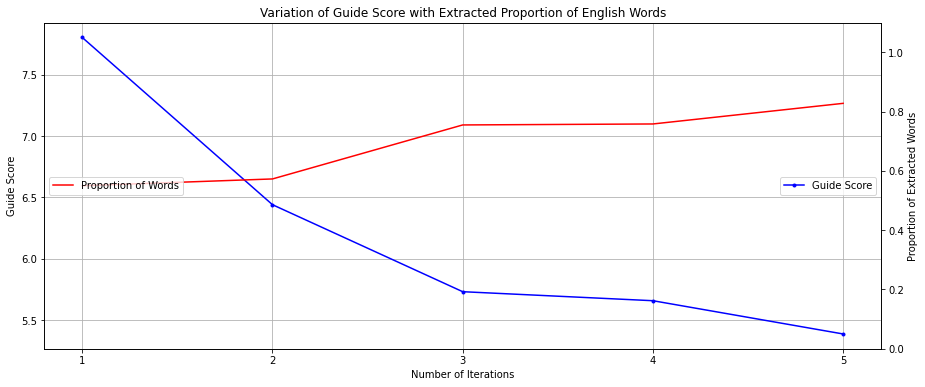

In [164]:
plot(l1,l2)